# Perform machine learning using genomic vectors

## Read data

### Vector data

In [1]:
import os
from pathlib import Path

import pandas as pd


vectorsDir = Path(os.environ['GENOMICS_DATA_BASE'], 'genome_vec')
vectorsTestDf = pd.read_csv(Path(vectorsDir, 'gene_test_vectorised.csv'))
vectorsTestDf.drop(columns=['BLOB_TEXT', 'Unnamed: 0'], inplace=True)
vectorsTrainDf = pd.read_csv(Path(vectorsDir, 'gene_train_vectorised.csv'))
vectorsTrainDf.drop(columns=['BLOB_TEXT', 'Unnamed: 0'], inplace=True)
vectorsValDf = pd.read_csv(Path(vectorsDir, 'gene_val_vectorised.csv'))
vectorsValDf.drop(columns=['BLOB_TEXT', 'Unnamed: 0'], inplace=True)
vectorsDf = pd.concat([vectorsTestDf, vectorsTrainDf, vectorsValDf], ignore_index=True)
vectorsDf

,patient_id,tube_id,vector
0,2092580,AH20L008,"[-0.2532142102718353, -0.12319359928369522, -0..."
1,2097130,AH19J077,"[-0.3853421211242676, -0.2268281728029251, -0...."
2,2097130,AH20I027,"[-0.39271822571754456, -0.22921983897686005, -..."
3,2110697,AH21C041,"[-0.2880496084690094, -0.16212013363838196, -0..."
4,2111939,AH19A091,"[-0.5479940176010132, -0.35276076197624207, -0..."
...,...,...,...
134,2185888,AH21B064,"[0.37154945731163025, 0.4720954895019531, 0.73..."
135,2191641,AH21A045,"[0.3131726384162903, 0.37569233775138855, 0.60..."
136,2195779,AH21A090,"[0.3441142737865448, 0.4080987870693207, 0.657..."
137,634545,AH21A011,"[0.3386542499065399, 0.45146483182907104, 0.68..."


### Tube ID mapping

In [2]:
import os
from pathlib import Path

import pandas as pd


patientTubeidMappingDf = pd.read_csv(Path(os.environ['GENOMICS_DATA_BASE'], 'patient_tube_id_mapping_full.tsv'), sep='\t')
patientTubeidMappingDf

,tube_code,PATIENT_ID,db_ID,pt_age,pt_gender,EPISODE_ID,hospital_admission,hospital_discharge,hospital_in_last_year,genome_species,species_reported,contig_number,length,tube_code_duplicate_or_old,date_of_collection,ID_number,location_additional_02,collected_from_original
0,AH19J072,213972.0,3JNQS,64,Male,12931474.0,2019-10-17,2019-11-29,yes,Escherichia coli,Escherichia coli,92,5131021,NaN,2019-10-30,19-303-0997,A-7EA;HAEM,Blood
1,AH19J074,213972.0,3JNQS,64,Male,12931474.0,2019-10-17,2019-11-29,yes,Streptococcus sp. D19,Streptococcus mitis group,84,2022991,NaN,2019-10-30,19-303-1174,A-7EA;HAEM,Blood Peripheral
2,AH19B003,526238.0,567AE,85,Male,640261.0,2019-02-04,2019-02-07,no,Escherichia coli,Escherichia coli,93,4942915,NaN,2019-02-03,19-034-1596,A-4WB;GMC,Blood
3,AH20A024,788941.0,3YBDS,58,Female,13194824.0,2020-01-16,2020-01-19,no,Escherichia coli,Escherichia coli,110,5149157,NaN,2020-01-16,20-016-2112,S-ED;Emergency,Blood Venous
4,AH20L041,1023735.0,2VJ78,42,Male,14210147.0,2020-12-18,2021-01-05,yes,Staphylococcus aureus,Staphylococcus aureus,46,2735216,NaN,2020-12-16,20-351-2856,Emergency Dept;nan,Blood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3112,ALF22L076,639020.0,3S6HL,84,Male,17219899.0,2022-12-15,2022-12-20,yes,Streptococcus vestibularis,Streptococcus salivarius group,107,1938627,NaN,2022-12-15,22-349-2150,Ward 4WB,Blood Peripheral
3113,ALF22L089,655404.0,6EWBM,67,Female,NaN,NaN,NaN,NaN,Proteus columbae,Proteus vulgaris,152,3972219,NaN,2022-12-17,22-351-1465,Comm/Amb Clinic,Blood
3114,ALF22L138,2572048.0,YM5PJ,61,Male,NaN,NaN,NaN,NaN,Enterobacter roggenkampii,Enterobacter cloacae complex,66,4876179,NaN,2022-12-27,22-361-0202,Ward 7 East,Hick White Lum
3115,ALF23A102,2054964.0,5DYAH,35,Female,17294287.0,2023-01-12,2023-02-01,yes,Streptococcus constellatus,Streptococcus anginosus group,54,1869828,NaN,2023-01-11,23-011-3305,ICU,Blood Venous


### Measurements data

In [3]:
import os
from pathlib import Path

import pandas as pd


dataDirName = Path(os.environ['DATA_DIR'], 'sepsis_prediction', 'lstm_initial_trials', '02_data_matrix', 'balanced_data')
dataDirName.mkdir(exist_ok=True, parents=True)

dataDf = pd.read_csv(Path(dataDirName, 'data.csv'))
dataDf = dataDf.sort_values(by=['PATIENT_ID', 'EPISODE_ID', 'measurement_datetime'], ascending=True)
dataDf

,PATIENT_ID,EPISODE_ID,measurement_datetime,Diastolic blood pressure_mean,Diastolic blood pressure_min,Diastolic blood pressure_max,Diastolic blood pressure_first,Diastolic blood pressure_last,Diastolic blood pressure_std,Heart rate_mean,...,Phosphate measurement_std,Magnesium measurement_mean,Magnesium measurement_min,Magnesium measurement_max,Magnesium measurement_first,Magnesium measurement_last,Magnesium measurement_std,Organism_FIRST_NOTED,sepsis,target
0,51211,17422049,2023-02-18,54.000000,54.000000,54.0,54.000000,54.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2023-04-01,0.0,0.0
1,51211,17422049,2023-02-19,54.000000,54.000000,54.0,54.000000,54.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2023-04-01,0.0,0.0
2,51211,17422049,2023-02-20,54.000000,54.000000,54.0,54.000000,54.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2023-04-01,0.0,0.0
3,56089,14164983,2020-12-07,55.285714,39.000000,80.0,48.000000,51.000000,16.948100,79.000000,...,0.070711,0.767143,0.766667,0.767619,0.766667,0.767619,0.014142,2020-12-07,0.0,0.0
4,56089,14164983,2020-12-08,58.285714,34.000000,86.0,34.000000,70.000000,20.171880,70.833333,...,0.070711,0.810000,0.810000,0.810000,0.810000,0.810000,0.014142,2020-12-07,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231552,2662222,17201307,2022-12-30,58.647186,53.285714,66.0,59.285714,58.428571,5.213477,120.880000,...,0.234087,0.910000,0.910000,0.910000,0.910000,0.910000,0.108044,2022-12-21,0.0,0.0
231553,2662222,17201307,2022-12-31,58.647186,53.285714,66.0,59.285714,58.428571,5.213477,129.120000,...,0.183848,1.050000,1.010000,1.090000,1.090000,1.010000,0.056569,2022-12-21,0.0,0.0
231554,2662222,17201307,2023-01-01,58.647186,53.285714,66.0,59.285714,58.428571,5.213477,126.000000,...,0.234087,0.900000,0.900000,0.900000,0.900000,0.900000,0.108044,2022-12-21,0.0,0.0
231555,2662222,17201307,2023-01-02,58.647186,53.285714,66.0,59.285714,58.428571,5.213477,64.400000,...,0.234087,3.500000,3.500000,3.500000,3.500000,3.500000,0.108044,2022-12-21,0.0,0.0


In [14]:
dataDf.groupby(by=['PATIENT_ID', 'sepsis']).agg(sepsis_max = pd.NamedAgg(column="sepsis", aggfunc="max")).reset_index()

,PATIENT_ID,sepsis,sepsis_max
0,51211,0.0,0.0
1,56089,0.0,0.0
2,62567,1.0,1.0
3,69841,0.0,0.0
4,110792,1.0,1.0
...,...,...,...
1888,2639188,0.0,0.0
1889,2642030,0.0,0.0
1890,2645864,0.0,0.0
1891,2652541,0.0,0.0


### Merge all the information

In [122]:
mergedDf = vectorsDf.merge(
    patientTubeidMappingDf[['tube_code', 'date_of_collection']].drop_duplicates(),
    how='inner',
    left_on=['tube_id'],
    right_on=['tube_code'],
).drop(
    columns=['tube_code']
).merge(
    dataDf.groupby(by=['PATIENT_ID']).agg(sepsis_max = pd.NamedAgg(column="sepsis", aggfunc="max")).reset_index(),
    how='inner',
    left_on=['patient_id'],
    right_on=['PATIENT_ID']
).drop(
    columns=['patient_id', 'date_of_collection', 'PATIENT_ID']
)
mergedDf

,tube_id,vector,sepsis_max
0,AH19J077,"[-0.3853421211242676, -0.2268281728029251, -0....",0.0
1,AH20I027,"[-0.39271822571754456, -0.22921983897686005, -...",0.0
2,AH20L035,"[-0.2594382166862488, -0.1408301740884781, -0....",1.0
3,AH19A048,"[-0.2566942572593689, -0.13847248256206512, -0...",1.0
4,AH19F072,"[-0.2748957872390747, -0.16017574071884155, -0...",0.0
5,AH21H028,"[-0.24557775259017944, -0.12764954566955566, -...",0.0
6,AH20L045,"[-0.25408586859703064, -0.15117493271827698, -...",1.0
7,AH20F012,"[-0.26666897535324097, -0.15388357639312744, -...",1.0
8,AH19F054,"[-0.7040156722068787, -0.7689500451087952, -1....",1.0
9,AH19G028,"[-0.724036455154419, -0.7798390984535217, -1.1...",0.0


## Create data

In [123]:
import ast
import numpy as np


X = mergedDf['vector']
X = X.apply(ast.literal_eval)
X=np.vstack(X).astype(np.float32)
Y = mergedDf['sepsis_max'].apply(lambda x: 1 if x else 0)
Y=np.vstack(Y).astype(np.float32)

In [124]:
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, shuffle=False)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((36, 300), (5, 300), (36, 1), (5, 1))

In [125]:
import torch
from torch import nn
import torch.utils.data as data


X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test, dtype=torch.float32)

loader = data.DataLoader(data.TensorDataset(X_train_tensor, Y_train_tensor), shuffle=False, batch_size=1024)

In [126]:
print(X_train_tensor.shape, Y_train_tensor.shape, X_test_tensor.shape, Y_test_tensor.shape)

torch.Size([36, 300]) torch.Size([36, 1]) torch.Size([5, 300]) torch.Size([5, 1])


In [127]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [128]:
class DnnModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(X_train_tensor.shape[1], int(X_train_tensor.shape[1]/2))
        self.linear2 = nn.Linear(int(X_train_tensor.shape[1]/2), 1)
        self.relu = nn.ReLU()
        # self.dropout = nn.Dropout(p=0.25)
    def forward(self, x):
        # return self.linear2(self.dropout(self.relu(self.linear1(x))))
        return self.linear2(self.relu(self.linear1(x)))

In [129]:
model = DnnModel().to(device)
model

DnnModel(
  (linear1): Linear(in_features=300, out_features=150, bias=True)
  (linear2): Linear(in_features=150, out_features=1, bias=True)
  (relu): ReLU()
)

In [130]:
learning_rate = 0.01

loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model.parameters(), lr=learning_rate)

In [131]:
# Forward pass
logits = model(X_train_tensor)

In [132]:
pred_probab = torch.round(torch.sigmoid(logits))

In [133]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = correct / len(y_pred) * 100
    return acc

In [134]:
# Number of epochs
epochs = 2000

# Send data to the device
x_train, x_valid = X_train_tensor.to(device), X_test_tensor.to(device)
y_train, y_valid = Y_train_tensor.to(device), Y_test_tensor.to(device)

# Empty loss lists to track values
epoch_count, train_loss_values, valid_loss_values = [], [], []

# Loop through the data
for epoch in range(epochs):

    # Put the model in training mode
    model.train()

    y_logits = model(x_train) # forward pass to get predictions; squeeze the logits into the same shape as the labels
    y_pred = torch.round(torch.sigmoid(y_logits)) # convert logits into prediction probabilities

    loss = loss_fn(y_logits, y_train) # compute the loss   
    acc = accuracy_fn(y_train.int(), y_pred) # calculate the accuracy; convert the labels to integers

    optimizer.zero_grad() # reset the gradients so they don't accumulate each iteration
    loss.backward() # backward pass: backpropagate the prediction loss
    optimizer.step() # gradient descent: adjust the parameters by the gradients collected in the backward pass
    
    # Put the model in evaluation mode
    model.eval() 

    with torch.inference_mode():
        valid_logits = model(x_valid)
        valid_pred = torch.round(torch.sigmoid(valid_logits))    

        valid_loss = loss_fn(valid_logits, y_valid)
        valid_acc = accuracy_fn(y_valid.int(), valid_pred)    
    
    # Print progress a total of 20 times
    if epoch % int(epochs / 20) == 0:
        print(f'Epoch: {epoch:4.0f} | Train Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Validation Loss: {valid_loss:.5f}, Accuracy: {valid_acc:.2f}%')

        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        valid_loss_values.append(valid_loss.detach().numpy())

Epoch:    0 | Train Loss: 0.67052, Accuracy: 66.67% | Validation Loss: 0.64566, Accuracy: 80.00%
Epoch:  100 | Train Loss: 0.61534, Accuracy: 69.44% | Validation Loss: 0.50272, Accuracy: 80.00%
Epoch:  200 | Train Loss: 0.61101, Accuracy: 66.67% | Validation Loss: 0.47444, Accuracy: 80.00%
Epoch:  300 | Train Loss: 0.60998, Accuracy: 66.67% | Validation Loss: 0.46886, Accuracy: 80.00%
Epoch:  400 | Train Loss: 0.60930, Accuracy: 66.67% | Validation Loss: 0.46748, Accuracy: 80.00%
Epoch:  500 | Train Loss: 0.60870, Accuracy: 66.67% | Validation Loss: 0.46702, Accuracy: 80.00%
Epoch:  600 | Train Loss: 0.60808, Accuracy: 66.67% | Validation Loss: 0.46684, Accuracy: 80.00%
Epoch:  700 | Train Loss: 0.60747, Accuracy: 66.67% | Validation Loss: 0.46676, Accuracy: 80.00%
Epoch:  800 | Train Loss: 0.60689, Accuracy: 66.67% | Validation Loss: 0.46680, Accuracy: 80.00%
Epoch:  900 | Train Loss: 0.60631, Accuracy: 66.67% | Validation Loss: 0.46690, Accuracy: 80.00%
Epoch: 1000 | Train Loss: 0.60

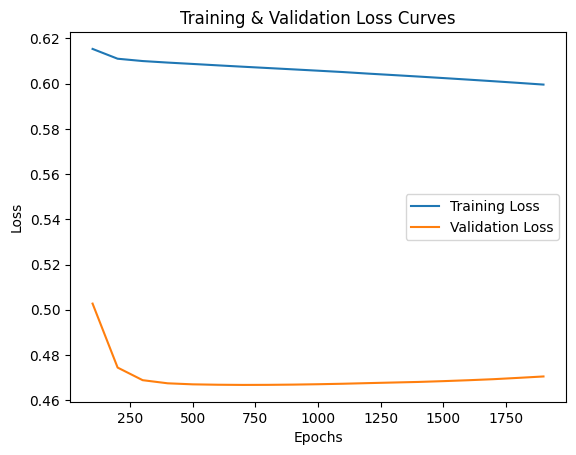

In [135]:
from matplotlib import pyplot as plt


plt.plot(epoch_count[1:], train_loss_values[1:], label='Training Loss')
plt.plot(epoch_count[1:], valid_loss_values[1:], label='Validation Loss')
plt.title('Training & Validation Loss Curves')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

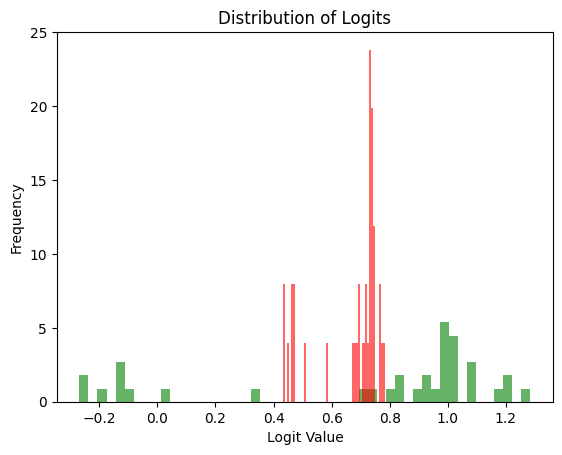

In [136]:
y_logits = model(x_train).squeeze() # forward pass to get predictions; squeeze the logits into the same shape as the labels
    # y_pred = torch.round(torch.sigmoid(y_logits)) # convert logits into prediction probabilities
# Create the histogram
plt.hist(y_logits.detach().numpy(), bins=50, density=True, alpha=0.6, color='g')
plt.hist(torch.sigmoid(y_logits).detach().numpy(), bins=50, density=True, alpha=0.6, color='r')

# Add labels and title
plt.xlabel('Logit Value')
plt.ylabel('Frequency')
plt.title('Distribution of Logits')

# Display the plot
plt.show()

In [137]:
y_logits = model(X_test_tensor).squeeze() # forward pass to get predictions; squeeze the logits into the same shape as the labels

In [138]:
from sklearn.metrics import roc_auc_score


score = roc_auc_score(Y_test_tensor, y_logits.detach().numpy())
score

np.float64(1.0)

In [139]:
from sklearn.metrics import roc_curve


fpr, tpr, thresholds = roc_curve(Y_test_tensor, y_logits.detach().numpy())

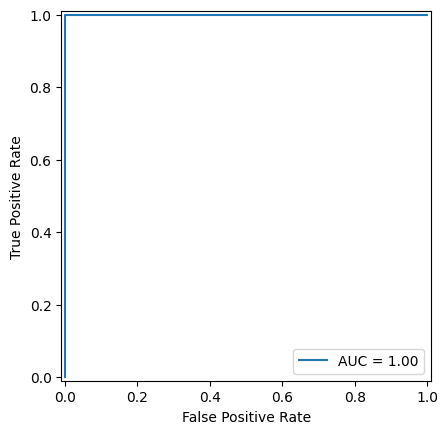

In [140]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay


display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=score)
display.plot()
plt.show()